# Regularized Linear Regression
<span style="font-size: 12px;">By: Marisol Hernandez</span>

## 1. Introduction to Regularized Linear Regression

Linear regression is a fundamental technique used for modeling the relationship between a target variable and one or more feature variables. However, traditional linear regression models can be prone to overfitting when dealing with datasets with high dimensionality or *\*multicollinearity*.

*\*Sidebar — multicollinearity is when two or more independent variables in a regression model are highly correlated with each other.*

Regularized linear regression techniques, such as **Ridge** and **Lasso** regression, address the issue of overfitting by introducing penalty terms to the cost function. These penalties discourage the model from fitting the data too closely, leading to better generalization performance.

<p align="center">
  <img src="imgs/regularization_impact.png" alt="Alt text" width="550" height="300">
</p>

## 2. Multiple Linear Regression without Regularization
Before exploring the effects of regularization, we want to model a multiple linear regression that can be expressed as:

$$\hat{y} = w_0 + w_1x_1 + w_2x_2 + ... + w_dx_d$$

where:

- $\hat{y}$ is the target variable

- $w_0$ corresponds to the y-intercept 

- $w_1, w_2, ..., w_d$ are the coefficients corresponding to each feature

- $x_1, x_2, ..., x_d$ are the features

Below we read in the **Airbnb in New York** dataset.

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Each row in the dataset corresponds to an Airbnb rental in New York. The dataset contains features such as `neighbourhood_group`, `neighbourhood`, `latitude`, `longitude`, `room_type`, etc.

`price` represents the price of the Airbnb for a single night in USD. In other words, it is the target that we aim to predict using the features (independent variables) provided in the dataset.

Though the focus of this notebook is not on EDA, we still need to perform some EDA and data preprocessing before we can model. First, lets drop any irrelevant features.



In [2]:
irrelevant_features = ["id", "name", "host_id", "host_name", "last_review"]

for feature in irrelevant_features:
    total_data = total_data.drop(columns=feature)

total_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Now lets separate our dataset into `X` and `y`.

In [3]:
# X includes all features excluding the target
X = total_data.drop(columns="price")

# Print X to confirm that price is no longer there
X.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0


In [4]:
# y represents the target
y = total_data["price"]

# Print y to inspect
y

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

The next step would be to factorize our categorical features (`neighbourhood_group`, `neighbourhood`, `room_type`). But first lets see if there are any missing values we need to address.

In [5]:
categorical_features = ["neighbourhood_group", "neighbourhood", "room_type"]

# Check for missing values in the specified columns
missing_values = X[categorical_features].isnull().sum()

# Print the result
print("Missing values in categorical features:")
print(missing_values)

Missing values in categorical features:
neighbourhood_group    0
neighbourhood          0
room_type              0
dtype: int64


No missing values:) If there were missing values in our categorical features these are a few common methods for dealing with them:

1. **Drop the rows**: Drop the rows with missing values completely. This is ideal when there are only a few rows with missing values.

2. **Drop the column**: If a significant portion of the column's values are missing (e.g., more than 50% or a threshold you set based on domain knowledge), it may be preferable to drop the column.

3. **Mode Imputation:** Replace missing values with the mode (most frequent value) of the feature. This method is simple and effective for categorical variables.

4. **Using a Separate 'Unknown' Category:** Create a new category (e.g., "Unknown") to represent missing values. This method ensures that missing values are treated differently from existing categories and prevents information loss.

Anyways, let's factorize. Usually we would do this before the train/test split, but instead lets prepare and fit a pipeline that does this so we can later use it after the train/test split and on new unseen data. This pipeline will be fit on the entire dataset since there is no risk for data leakage when factorizing categorical features.

*Note: A separate notebook on pipelines will be prepared.*

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Create a custom transformer class for factorizing categorical features
class FactorizeCategorical(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_features):
        self.categorical_features = categorical_features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for feature in self.categorical_features:
            # Factorize the feature
            X_copy[feature + '_factorized'], _ = pd.factorize(X_copy[feature])
            # Drop the original feature from the dataset
            X_copy.drop(columns=feature, inplace=True)
        return X_copy

categorical_pipeline = Pipeline([
    ('factorize_categorical', FactorizeCategorical(categorical_features))
])

# Fit the categorical pipeline on the entire dataset
categorical_pipeline.fit(X)

Pipeline(steps=[('factorize_categorical',
                 FactorizeCategorical(categorical_features=['neighbourhood_group',
                                                            'neighbourhood',
                                                            'room_type']))])

We still need to impute missing values/outliers and scale our numeric features but first we need to do a train/test split to avoid data leakage.

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training (80% of the data) and testing (20% of the data) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In a previous session, we imputed missing values/outliers without the use of pipelines. In this notebook lets use pipelines. 

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a custom transformer class for replacing outliers
class ReplaceOutliers(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # This loop will replace outliers for each column
        for column in X.columns:
            # Calculate Q_25 and Q_75 for the column
            Q_25 = X[column].quantile(0.25)
            Q_75 = X[column].quantile(0.75)

            # Calculate the IQR
            IQR = Q_75 - Q_25

            # Calculate the upper and lower limit
            upper_limit = Q_75 + 1.5 * IQR
            lower_limit = Q_25 - 1.5 * IQR

            # Replace the outliers
            X.loc[X[column] < lower_limit, column] = Q_25
            X.loc[X[column] > upper_limit, column] = Q_75

        return X

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer  # sklearn has a pre-built imputer for NaNs
from sklearn.preprocessing import StandardScaler

# Define my numeric features, we defined the categorical features earlier
numeric_features = ["latitude", "longitude", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

# Create the pipeline for numeric features
numeric_pipeline = Pipeline([
    ('outlier_replacement', ReplaceOutliers()),
    ('nan_imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),  
])

# Combine the pipelines using ColumnTransformer
transformer_pipeline = ColumnTransformer([
    ('categorical_transformer', categorical_pipeline, categorical_features),
    ('numeric_transformer', numeric_pipeline, numeric_features),
])

# Fit and transform X_train
X_train_transformed = transformer_pipeline.fit_transform(X_train)

# Convert X_train to a DataFrame just for inspection
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=categorical_features + numeric_features)
X_train_transformed_df.head()

,neighbourhood_group,neighbourhood,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.0,0.0,0.0,-0.246025,0.075660,-0.010503,-0.033096,-0.199970,-0.666634,-0.852862
1,1.0,1.0,1.0,2.289173,0.573997,-0.538561,-0.707001,-0.861482,-0.666634,-0.860447
2,0.0,2.0,1.0,-0.737101,-0.064561,-0.538561,-0.856758,-0.330409,1.008775,-0.860447
3,0.0,2.0,0.0,-0.844666,0.886719,-0.010503,0.940324,0.880812,-0.666634,1.164663
4,2.0,3.0,1.0,0.348435,2.081787,1.045613,0.116661,-0.777629,-0.666634,-0.860447


In [10]:
# Transform X_test
X_test_transformed = transformer_pipeline.transform(X_test)

# Convert X_test to a DataFrame just for inspection
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=categorical_features + numeric_features)
X_test_transformed_df.head()

,neighbourhood_group,neighbourhood,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.0,0.0,0.0,-1.618719,-0.679917,-0.010503,0.865445,-0.349043,-0.666634,0.573058
1,1.0,1.0,1.0,-0.419156,1.673231,1.045613,-0.856758,-0.330409,-0.666634,-0.306765
2,2.0,2.0,1.0,0.616588,-1.096543,-0.538561,0.416175,-0.609921,-0.666634,-0.860447
3,2.0,3.0,0.0,-0.400721,-1.780496,-0.538561,-0.482366,0.741056,1.008775,1.202586
4,2.0,4.0,0.0,1.289727,0.829891,-0.538561,1.389594,-0.265189,-0.666634,-0.632906


Now we can train our MLR and evaluate its model performance.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# Fit the Multiple Linear Regression model
# Notice that we are using X_train_transformed to fit
mlr_model = LinearRegression()
mlr_model.fit(X_train_transformed, y_train)

# Make predictions using X_test_transformed
y_hat = mlr_model.predict(X_test_transformed)

# Calculate MAE
mlr_mae = metrics.mean_absolute_error(y_test, y_hat)

# Calculate MSE
mlr_mse = metrics.mean_squared_error(y_test, y_hat)

# Calculate RMSE
mlr_rmse = np.sqrt(mlr_mse)

# Calculate R-squared score
mlr_r_squared = metrics.r2_score(y_test, y_hat)

# Print the model metrics
# print(f"Mean Absolute Error (Multiple Linear Regression): {mlr_mae}")
print("Mean Squared Error (Multiple Linear Regression):", mlr_mse)
print("Root Mean Squared Error (Multiple Linear Regression):", mlr_rmse)
# print(f"R-squared Score (Multiple Linear Regression): {mlr_r_squared}")
print(f"We can say that our model's predictions are off by ${round(mlr_rmse, 2)} on average")

Mean Squared Error (Multiple Linear Regression): 38842.574209144375
Root Mean Squared Error (Multiple Linear Regression): 197.0851953068631
We can say that our model's predictions are off by $197.09 on average


Now lets inspect the intercept and the coefficients of our model.

In [12]:
# Get the coefficients of the linear regression model
coefficients = mlr_model.coef_

# Get the intercept of the linear regression model
intercept = mlr_model.intercept_

# Create a DataFrame for the intercept
intercept_df = pd.DataFrame([intercept], index=['intercept'], columns=['Coefficient'])

# Convert coefficients array into a DataFrame for easier inspection
coefficients_df = pd.DataFrame(coefficients, index=X_train_transformed_df.columns, columns=['Coefficient'])

# Concatenate intercept DataFrame with coefficients DataFrame
mlr_coefficients_df = pd.concat([intercept_df, coefficients_df])

# Print the DataFrame
print("MLR Model Coefficients:")
mlr_coefficients_df


MLR Model Coefficients:


,Coefficient
intercept,205.156811
neighbourhood_group,1.483442
neighbourhood,-0.111259
room_type,-97.708054
latitude,11.499133
longitude,-36.560105
minimum_nights,-10.815672
number_of_reviews,-15.942762
reviews_per_month,-2.620639
calculated_host_listings_count,-2.223115


We can plug our coefficients into a equation that represents our MLR model.

$$\hat{y} = 205.16 + 1.48x_1 - 0.11x_2 - 97.71x_3 + 11.50x_4 - 36.56x_5 - 10.82x_6 - 15.94x_7 - 2.62x_8 -2.22x_9 + 27.03x_{10}$$

## 3. Ridge Regression
Ridge regression adds a penalty term proportional to the square of the magnitude of coefficients to the cost function (in this case, the cost function is $\text{MSE}$). This penalty term shrinks the coefficients towards zero, but they never actually reach zero.

Mathematically, the cost function of Ridge regression can be expressed as:

$$J(w) = \text{MSE} + \lambda \sum_{d=1}^{m} w_d^2$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~= \frac{1}{2n}\sum_{i=1}^{n}(\hat{y}_{i} - y_{i})^2 + \lambda \sum_{d=1}^{m} w_d^2$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~= \frac{1}{2n}\sum_{i=1}^{n}((w_0 + w_1x_{i1} + w_2x_{i2} + ... + w_dx_{id}) - y_{i})^2 + \lambda \sum_{d=1}^{m} w_d^2$$

where $\text{MSE}$ is the mean squared error, $\lambda$ is the regularization parameter, and $w_d$ are the regression coefficients.

### Selecting $\lambda$
In ridge regression, the regularization parameter $\lambda$ (lambda) plays a crucial role in controlling the balance between fitting the training data well and keeping the model's coefficients small. 

Choosing the appropriate value of $\lambda$ is essential to ensure the model's generalization performance.

#### Effects of $\lambda$
1. **Bias-Variance Tradeoff**: Higher $\lambda$ increases bias and reduces variance, while lower  does the opposite. Finding the right balance is essential.

2. **Overfitting vs. Underfitting**: Too low $\lambda$ can lead to overfitting, capturing noise. Too high $\lambda$ may cause underfitting, oversimplifying the model.

3. **Shrinkage of Coefficients**: Ridge regression shrinks coefficients towards zero with increasing $\lambda$, reducing the impact of predictors.

We can observe how the coefficients shrink as $\lambda$ increases below.

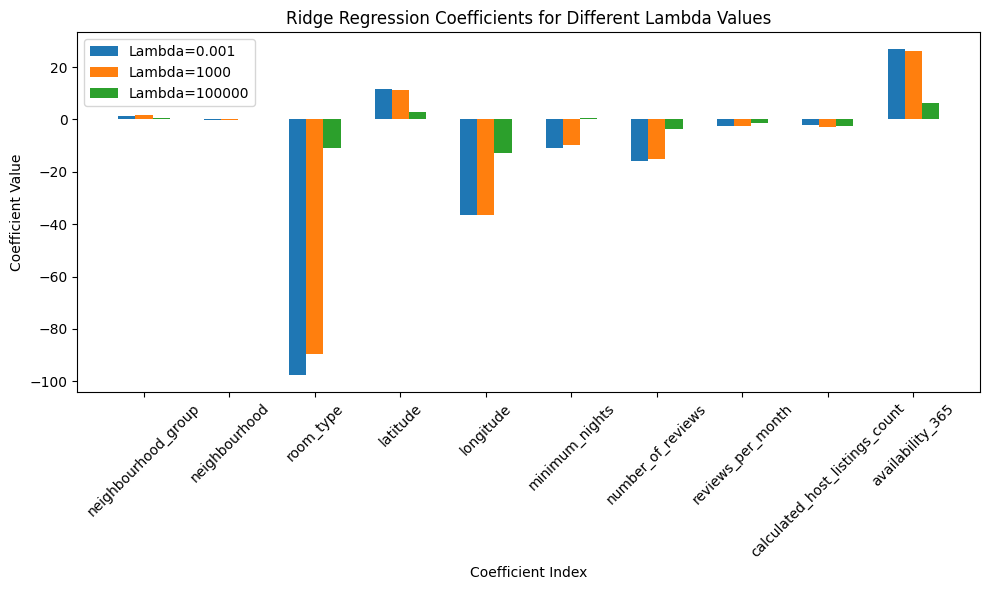

In [41]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Define the values of lambda (regularization parameter)
lambda_values = [10**-3, 10**3, 10**5]

# Train Ridge regression models for each lambda value and extract coefficients
coefficients = []
for lambda_val in lambda_values:
    ridge_model = Ridge(alpha=lambda_val)
    ridge_model.fit(X_train_transformed, y_train)
    coefficients.append(ridge_model.coef_)

# Plot the coefficients
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(coefficients[0]))

for i, coef in enumerate(coefficients):
    plt.bar(index + i * bar_width, coef, bar_width, label=f'Lambda={lambda_values[i]}')

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients for Different Lambda Values')
plt.xticks(index + bar_width, X_train_transformed_df.columns, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Methods for Selecting $\lambda$
1. **Cross-Validation**: Evaluate model performance for different $\lambda$ values using techniques like k-fold cross-validation.

2. **Grid Search**: Systematically search through a predefined set of $\lambda$ values to find the one optimizing a chosen performance metric.

3. **Regularization Path**: Plot coefficients against  to understand the effect on predictors and select an appropriate $\lambda$.

4. **Information Criteria**: Use AIC or BIC to balance model complexity and goodness of fit.

Below we use **Grid Search** to find the optimal $\lambda$ out of the predefined set.

In [42]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values using a logarithmic scale (this is our lambda)
alphas = np.logspace(-3, 3, 7)  # Example range from 10^-3 to 10^3

# Create a Ridge regression model
ridge_model = Ridge()

# Define the pipeline
ridge_pipeline = Pipeline([
    ('transformer', transformer_pipeline),
    ('ridge', ridge_model)
])

# Define the parameter grid to search over
ridge_param_grid = {'ridge__alpha': alphas}  # Note the prefix 'ridge__' to specify the parameter inside the pipeline

# Create GridSearchCV object
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
ridge_grid_search.fit(X_train, y_train)

# Get the best alpha (lambda) value
best_alpha = ridge_grid_search.best_params_['ridge__alpha']
print("Best Alpha (Lambda):", best_alpha)


Best Alpha (Lambda): 1000.0


In [45]:
# Get the best Ridge model
best_ridge_model = ridge_grid_search.best_estimator_

# Make predictions using X_test
# Note: Our model is a pipeline so we can pass the raw X_test
y_pred = best_ridge_model.predict(X_test)

# Calculate Mean Squared Error
ridge_mse = metrics.mean_squared_error(y_test, y_pred)

# Calculate RMSE
ridge_rmse = np.sqrt(ridge_mse)

# Print the MSE and RMSE
print("Mean Squared Error (Ridge Regression):", ridge_mse)
print("Root Mean Squared Error (Ridge Regression):", ridge_rmse)
print(f"We can say that our Ridge regression model's predictions are off by ${round(ridge_rmse, 2)} on average")

Mean Squared Error (Ridge Regression): 38863.30164736597
Root Mean Squared Error (Ridge Regression): 197.1377732636898
We can say that our Ridge regression model's predictions are off by $197.14 on average


In [47]:
# Get the coefficients of the Ridge regression model from the best_estimator_ attribute of the pipeline
ridge_coefficients = best_ridge_model.named_steps['ridge'].coef_

# Get the intercept of the Ridge regression model
ridge_intercept = best_ridge_model.named_steps['ridge'].intercept_

# Create a DataFrame for the intercept
ridge_intercept_df = pd.DataFrame([ridge_intercept], index=['intercept'], columns=['Coefficient'])

# Convert coefficients array into a DataFrame for easier inspection
ridge_coefficients_df = pd.DataFrame(ridge_coefficients, index=X_train_transformed_df.columns, columns=['Coefficient'])

# Concatenate intercept DataFrame with coefficients DataFrame
ridge_coefficients_df = pd.concat([ridge_intercept_df, ridge_coefficients_df])

# Print the DataFrame
print("Ridge Regression Model Coefficients:")
ridge_coefficients_df

Ridge Regression Model Coefficients:


,Coefficient
intercept,200.760332
neighbourhood_group,1.656390
neighbourhood,-0.108375
room_type,-89.401490
latitude,11.142090
longitude,-36.516303
minimum_nights,-9.664026
number_of_reviews,-15.270017
reviews_per_month,-2.478644
calculated_host_listings_count,-2.911229


## 4. Lasso Regression
Lasso (Least Absolute Shrinkage and Selection Operator) regression is another form of linear regression that incorporates a regularization term into the cost function. 

Similar to Ridge regression, Lasso regression adds a penalty term to the cost function, but instead of using the square of the magnitude of coefficients, it uses the absolute value of the coefficients.

Mathematically, the cost function of Lasso regression can be expressed as:

$$J(w) = \text{MSE} + \lambda \sum_{d=1}^{m} |w_d|$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~= \frac{1}{2n}\sum_{i=1}^{n}(\hat{y}_{i} - y_{i})^2 + \lambda \sum_{d=1}^{m}|w_d|$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~= \frac{1}{2n}\sum_{i=1}^{n}((w_0 + w_1x_{i1} + w_2x_{i2} + ... + w_dx_{id}) - y_{i})^2 + \lambda \sum_{d=1}^{m} |w_d|$$

where $\text{MSE}$ is the mean squared error, $\lambda$ is the regularization parameter, and $w_d$ are the regression coefficients.

Lasso regression encourages sparsity in the coefficients by driving some of them to exactly zero, effectively performing feature selection.

### Selecting $\lambda$
In Lasso regression, $\lambda$ controls the strength of regularization, impacting feature selection and model complexity. Choosing the right $\lambda$ is crucial for balancing bias and variance.

#### Effects of $\lambda$
1. **Feature Selection**: Higher $\lambda$ encourages sparsity in coefficients, leading to feature selection. Lower $\lambda$ values result in less sparsity and potentially more complex models.

2. **Bias-Variance Tradeoff**: Increasing $\lambda$ increases bias and reduces variance. Lower $\lambda$ values fit training data closely but may overfit, while higher $\lambda$ values constrain the model, reducing variance but potentially underfitting.

3. **Sparsity vs. Complexity**: $\lambda$ balances the tradeoff between sparsity and model complexity. Smaller $\lambda$ values yield less sparse, more complex models, while larger values lead to sparser, simpler models.

We can observe the effects of $\lambda$ below.

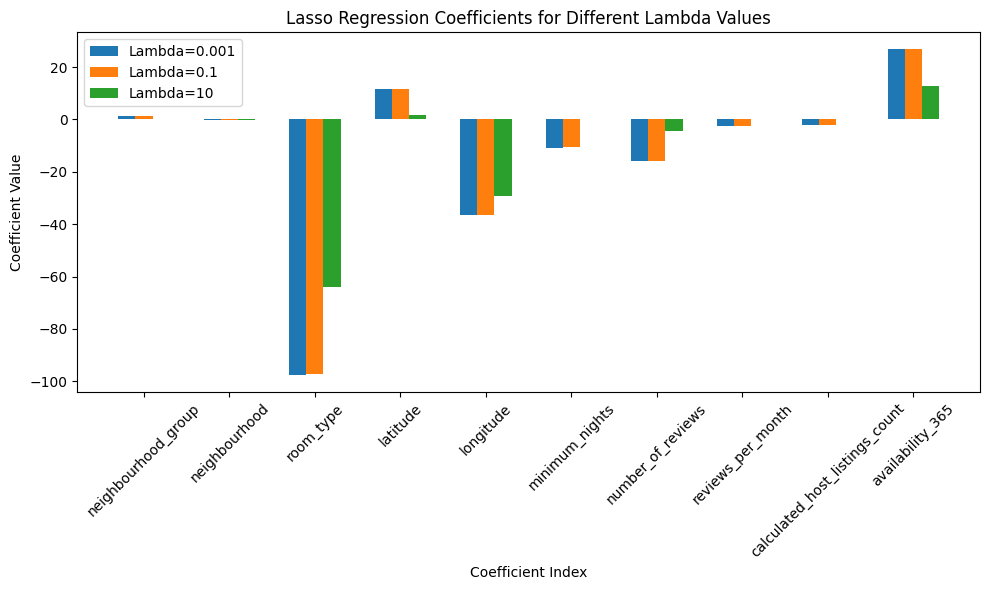

In [54]:
from sklearn.linear_model import Lasso

# Define the values of lambda (regularization parameter)
lambda_values = [10**-3, 10**-1, 10**1]

# Train Lasso regression models for each lambda value and extract coefficients
coefficients = []
for lambda_val in lambda_values:
    lasso_model = Lasso(alpha=lambda_val)
    lasso_model.fit(X_train_transformed, y_train)
    coefficients.append(lasso_model.coef_)

# Plot the coefficients
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(coefficients[0]))

for i, coef in enumerate(coefficients):
    plt.bar(index + i * bar_width, coef, bar_width, label=f'Lambda={lambda_values[i]}')

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients for Different Lambda Values')
plt.xticks(index + bar_width, X_train_transformed_df.columns, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Methods for Selecting $\lambda$
1. **Cross-Validation**: Use k-fold cross-validation to evaluate model performance for different $\lambda$ values and select the one with the best generalization performance.

2. **Grid Search**: Evaluate model performance for predefined $\lambda$ values systematically to find the optimal one.

3. **Regularization Path**: Plot coefficients against $\lambda$ values to understand regularization effects on predictors and select an appropriate $\lambda$.

4. **Information Criteria**: Employ AIC or BIC to balance model complexity and fit, favoring simpler models while capturing essential patterns.

Below we use **Grid Search** to find the optimal $\lambda$ out of the predefined set.

In [62]:
from sklearn.linear_model import Lasso

# Define a range of alpha values using a logarithmic scale
alphas = np.logspace(-2, 1, 7)

# Create a Lasso regression model
lasso_model = Lasso()

# Define the pipeline
lasso_pipeline = Pipeline([
    ('transformer', transformer_pipeline),
    ('lasso', lasso_model)
])

# Define the parameter grid to search over
lasso_param_grid = {'lasso__alpha': alphas}  # Note the prefix 'lasso__' to specify the parameter inside the pipeline

# Create GridSearchCV object
lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
lasso_grid_search.fit(X_train, y_train)

# Get the best alpha (lambda) value
best_alpha = lasso_grid_search.best_params_['lasso__alpha']
print("Best Alpha (Lambda):", best_alpha)

Best Alpha (Lambda): 10.0


In [63]:
# Get the best Lasso model
best_lasso_model = lasso_grid_search.best_estimator_

# Make predictions using X_test
# Note: Our model is a pipeline so we can pass the raw X_test
y_pred = best_lasso_model.predict(X_test)

# Calculate Mean Squared Error
lasso_mse = metrics.mean_squared_error(y_test, y_pred)

# Calculate RMSE
lasso_rmse = np.sqrt(lasso_mse)

# Print the MSE and RMSE
print("Mean Squared Error (Lasso Regression):", lasso_mse)
print("Root Mean Squared Error (Lasso Regression):", lasso_rmse)
print(f"We can say that our Lasso regression model's predictions are off by ${round(lasso_rmse, 2)} on average")

Mean Squared Error (Lasso Regression): 39513.13377555123
Root Mean Squared Error (Lasso Regression): 198.77910799566243
We can say that our Lasso regression model's predictions are off by $198.78 on average


In [64]:
# Get the coefficients of the Lasso regression model from the best_estimator_ attribute of the pipeline
lasso_coefficients = best_lasso_model.named_steps['lasso'].coef_

# Get the intercept of the Lasso regression model
lasso_intercept = best_lasso_model.named_steps['lasso'].intercept_

# Create a DataFrame for the intercept
lasso_intercept_df = pd.DataFrame([lasso_intercept], index=['intercept'], columns=['Coefficient'])

# Convert coefficients array into a DataFrame for easier inspection
lasso_coefficients_df = pd.DataFrame(lasso_coefficients, index=X_train_transformed_df.columns, columns=['Coefficient'])

# Concatenate intercept DataFrame with coefficients DataFrame
lasso_coefficients_df = pd.concat([lasso_intercept_df, lasso_coefficients_df])

# Print the DataFrame
print("Lasso Regression Model Coefficients:")
lasso_coefficients_df


Lasso Regression Model Coefficients:


,Coefficient
intercept,186.996972
neighbourhood_group,0.000000
neighbourhood,-0.033846
room_type,-64.073425
latitude,1.777396
longitude,-29.315664
minimum_nights,-0.000000
number_of_reviews,-4.410782
reviews_per_month,-0.000000
calculated_host_listings_count,-0.000000


## 5. Comparing Models

In [69]:
import plotly.graph_objs as go

models = ['MLR', 'Ridge', 'Lasso']
mse_values = [mlr_mse, ridge_mse, lasso_mse]
colors = ['blue', 'green', 'red']
coefficients_dfs = [mlr_coefficients_df, ridge_coefficients_df, lasso_coefficients_df]

# Plot MSE for each model
mse_trace = go.Bar(
    x=models,
    y=mse_values,
    marker=dict(color=colors),
    hoverinfo='y',
)

# Create figure layout
mse_layout = go.Layout(
    title='Mean Squared Error (MSE) of Models',
    xaxis=dict(title='Model'),
    yaxis=dict(title='MSE', range=[max(mse_values) * 0.90, max(mse_values) * 1.01]),
)

# Create figure object
mse_fig = go.Figure(data=[mse_trace], layout=mse_layout)

# Plot coefficients for each model
coeff_trace = []
for i, model_df in enumerate(coefficients_dfs):
    model_name = models[i]
    coefficients = model_df['Coefficient'].values
    feature_names = model_df.index
    coeff_trace.append(go.Bar(
        x=feature_names,
        y=coefficients,
        name=model_name,
        marker=dict(color=colors[i]),
        hoverinfo='y',
    ))

# Create figure layout
coeff_layout = go.Layout(
    title='Coefficients of Models',
    xaxis=dict(title='Feature'),
    yaxis=dict(title='Coefficient'),
    barmode='group',
)

# Create figure object
coeff_fig = go.Figure(data=coeff_trace, layout=coeff_layout)

# Display interactive plot
mse_fig.show()
coeff_fig.show()